In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
def get_metrics(y_true,y_pred):

    metric_dict={}
    metric_dict['MAPE']= np.mean(abs((y_true-y_pred)/y_true))*100
    metric_dict['RMSE'] = float(format(np.sqrt(mean_squared_error(y_true, y_pred)),'.3f'))
    metric_dict['MSE'] = mean_squared_error(y_true, y_pred)
    metric_dict['MAE'] = mean_absolute_error(y_true, y_pred)
    metric_dict['r2'] = r2_score(y_true, y_pred)
    metric_dict=pd.DataFrame(metric_dict,index=[0]).T
    metric_dict.columns=['score']
    return metric_dict

In [3]:
df=pd.read_excel("daily1.xlsx")

In [4]:
df=df[['DATE', 'ASH', 'VM', 'MOISTURE', 'MAX_EXPANSION',
       'MAX_FLUIDITY', 'CSN', 'FLUE_TEMP', 'S_0P5MM', 'S_3P15MM', 'CT', 'CET',
       'ST','CBT','CSR']]

In [5]:
df.dropna(subset=['CSR'],inplace=True)

In [6]:
df.shape

(921, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           921 non-null    datetime64[ns]
 1   ASH            915 non-null    float64       
 2   VM             915 non-null    float64       
 3   MOISTURE       917 non-null    float64       
 4   MAX_EXPANSION  712 non-null    float64       
 5   MAX_FLUIDITY   647 non-null    float64       
 6   CSN            715 non-null    float64       
 7   FLUE_TEMP      899 non-null    float64       
 8   S_0P5MM        914 non-null    float64       
 9   S_3P15MM       913 non-null    float64       
 10  CT             921 non-null    float64       
 11  CET            921 non-null    float64       
 12  ST             921 non-null    float64       
 13  CBT            920 non-null    float64       
 14  CSR            921 non-null    float64       
dtypes: datetime64[ns](1), f

In [8]:
df['DATE']= pd.to_datetime(df['DATE'])

In [9]:
print(df['DATE'].min())
print(df['DATE'].max())

2019-04-13 00:00:00
2022-01-05 00:00:00


In [10]:
df.describe()

,ASH,VM,MOISTURE,MAX_EXPANSION,MAX_FLUIDITY,CSN,FLUE_TEMP,S_0P5MM,S_3P15MM,CT,CET,ST,CBT,CSR
count,915.000000,915.000000,917.000000,712.000000,647.000000,715.000000,899.000000,914.000000,913.000000,921.000000,921.000000,921.000000,920.000000,921.000000
mean,12.536585,24.421580,10.450871,22.709270,591.047141,6.259091,1169.573546,50.475357,88.570208,1407.531059,1011.430570,284.037634,1282.867645,66.591180
std,1.123461,36.650774,0.593774,15.054253,541.940479,2.913690,86.755855,1.869636,1.885018,230.269181,40.372724,22.590082,43.794220,1.302853
min,10.035000,19.036667,7.100000,-15.000000,26.000000,4.000000,327.467917,43.498000,80.577600,1206.326005,672.630378,229.045408,859.350000,58.400000
25%,11.718333,22.704167,10.066667,12.000000,183.500000,5.500000,1138.814687,49.221750,87.218333,1291.859670,1009.975300,268.015066,1274.500000,65.700000
50%,12.665000,23.150000,10.400000,23.000000,390.000000,6.000000,1182.934167,50.467833,88.194667,1331.501592,1022.578987,281.841724,1294.541667,66.621000
75%,13.183333,23.688333,10.800000,34.000000,891.000000,6.500000,1204.233333,51.696167,89.843000,1409.725722,1030.127787,296.979585,1306.875000,67.414000
max,29.696667,1131.635000,14.583333,63.000000,4608.000000,82.000000,1342.266250,57.208000,93.705000,2294.838149,1054.870068,363.342519,1340.833333,70.300000


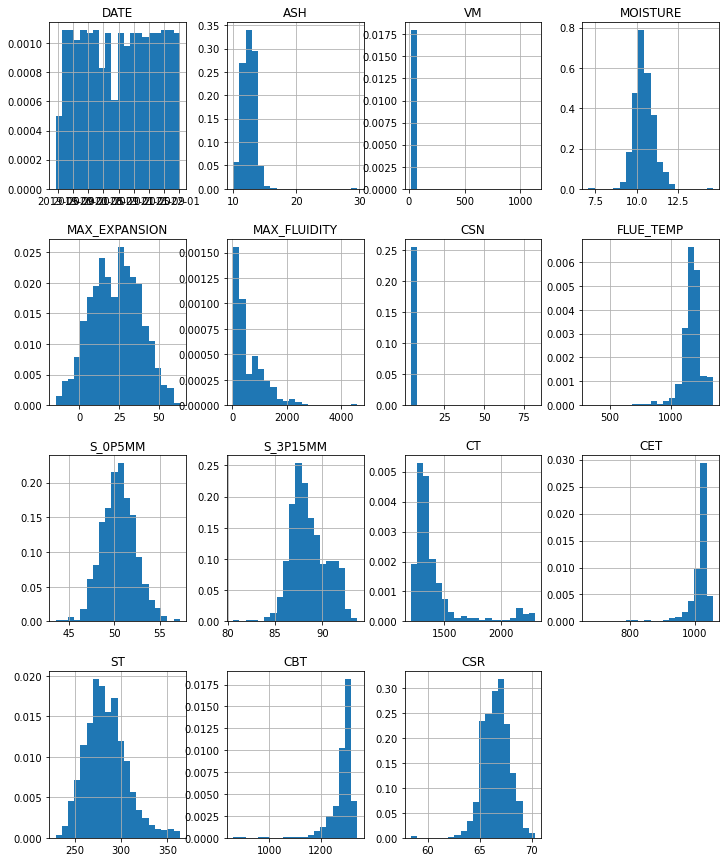

In [11]:
df.hist(bins=20, density=True, figsize=(12, 15))
plt.show()

In [12]:
median = df.loc[df['ASH']<14.63, 'ASH'].median()
print(median)
df.loc[df.ASH >= 14.63, 'ASH'] = np.nan
df.ASH.fillna(median,inplace=True)

12.64


In [13]:
median = df.loc[df['VM']<24.83, 'VM'].median()
print(median)

df.loc[df.VM >= 24.83, 'VM'] = np.nan
df.VM.fillna(median,inplace=True)

23.13999999999995


In [14]:
median = df.loc[df['CSN']<7, 'CSN'].median()
print(median)

df.loc[df.CSN >=7, 'CSN'] = np.nan
df.CSN.fillna(median,inplace=True)

6.0


In [15]:
median = df.loc[df['MAX_FLUIDITY']<2125, 'MAX_FLUIDITY'].median()
print(median)

df.loc[df.MAX_FLUIDITY >=2125, 'MAX_FLUIDITY'] = np.nan
df.MAX_FLUIDITY.fillna(median,inplace=True)

380.0


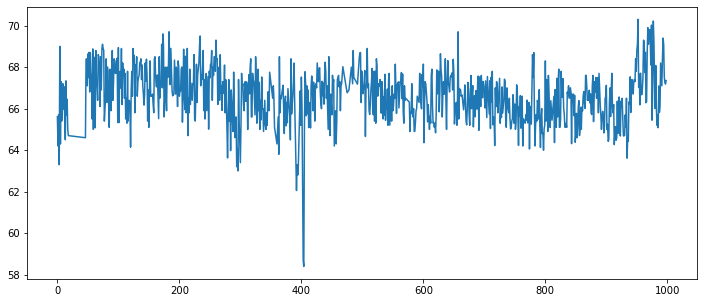

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df['CSR'])
plt.show()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer

In [18]:
pipe_1= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', Ridge())])
pipe_2= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', Lasso())])
pipe_3= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', DecisionTreeRegressor())])
pipe_4= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', LinearRegression())])
pipe_5= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', SVR())])
pipe_6= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', RandomForestRegressor())])
pipe_7= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', ExtraTreeRegressor())])
pipe_8= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', lgb.LGBMRegressor())])
pipe_9= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', XGBRegressor())])

In [19]:
pipelines=[pipe_1,pipe_2,pipe_3,pipe_4,pipe_5,pipe_6,pipe_7,pipe_8,pipe_9]

In [20]:
df.columns

Index(['DATE', 'ASH', 'VM', 'MOISTURE', 'MAX_EXPANSION', 'MAX_FLUIDITY', 'CSN',
       'FLUE_TEMP', 'S_0P5MM', 'S_3P15MM', 'CT', 'CET', 'ST', 'CBT', 'CSR'],
      dtype='object')

In [21]:
def batchwise_model(df,pipe,window_size=180, test_period=30):
    print("**"*10)
    print("Window size=",window_size,"test period", test_period)
    print("Pipe line", pipe)
    train=df.iloc[-window_size-test_period:-test_period]
    test=df.iloc[-test_period:]
    print(train['DATE'].min(),train['DATE'].max())
    print(test['DATE'].min(),test['DATE'].max())
    X_train= train.drop(['DATE', 'CSR'],axis=1)
    y_train= train["CSR"]
    tracker=[]
    pipe=pipe.fit(X_train, y_train)
    y_train_pred=pipe.predict(X_train)
    for i in range(len(test)):
        X_test= test.iloc[i].drop(['DATE', 'CSR'])
        y_test= test['CSR'].iloc[i]
        # Predict for the ith data point
        y_test_pred =  pipe.predict(X_test.values.reshape(1,-1))
        # Store the results
        tracker.append([y_test, y_test_pred[0]])
        # Update training data
        y_train=y_train.append(pd.Series(y_test))
        X_train=X_train.append(X_test)
        #refresh the model after a day
        pipe=pipe.fit(X_train[-window_size:], y_train[-window_size:])
    tracker=pd.DataFrame(tracker)
    tracker.columns=["Actual", "Prediction"]
    print(get_metrics(tracker["Actual"].values,tracker["Prediction"].values))
    return tracker

In [22]:
for pipe in pipelines:
    batchwise_model(df,pipe,window_size=180, test_period=45)

********************
Window size= 180 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', Ridge())])
2021-05-24 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  1.939911
RMSE  1.605000
MSE   2.574421
MAE   1.320066
r2   -0.300856
********************
Window size= 180 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', Lasso())])
2021-05-24 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  2.340896
RMSE  1.960000
MSE   3.840565
MAE   1.604019
r2   -0.940639
********************
Window size= 180 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', DecisionTreeRegressor())])
2021-05-24 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  2.127099
RMSE  1.789000


In [58]:
out=batchwise_model(df,pipe_6,window_size=120, test_period=45)

********************
Window size= 120 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', RandomForestRegressor())])
2021-07-24 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  1.768083
RMSE  1.458000
MSE   2.125830
MAE   1.203666
r2   -0.074182


<AxesSubplot:>

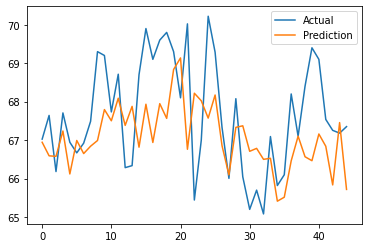

In [59]:
out.plot()

In [60]:
out.to_csv('temp3.csv')

In [53]:
window_sizes=[240,210,180,150,120,90]

In [54]:
for size in window_sizes:
    batchwise_model(df,pipe_6,window_size=size, test_period=45)

********************
Window size= 240 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', RandomForestRegressor())])
2021-03-24 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  1.976219
RMSE  1.679000
MSE   2.819171
MAE   1.348580
r2   -0.424528
********************
Window size= 210 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', RandomForestRegressor())])
2021-04-23 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  1.898425
RMSE  1.590000
MSE   2.526732
MAE   1.291665
r2   -0.276758
********************
Window size= 180 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', RandomForestRegressor())])
2021-05-24 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         scor

In [ ]:
#Decision Tree3 Window =150 
#XGBoost9 
#SVR  Window= 150

## Model Tuning


In [55]:
window_size=150
test_period=45

In [56]:
train=df.iloc[-window_size-test_period:-test_period]

In [57]:
train.columns

Index(['DATE', 'ASH', 'VM', 'MOISTURE', 'MAX_EXPANSION', 'MAX_FLUIDITY', 'CSN',
       'FLUE_TEMP', 'S_0P5MM', 'S_3P15MM', 'CT', 'CET', 'ST', 'CBT', 'CSR'],
      dtype='object')

In [33]:
X_train=train.drop(['DATE','CSR'],axis=1)
y_train= train['CSR'].values

In [34]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)

imputer= KNNImputer()
X_train_imputed=imputer.fit_transform(X_train_std)

In [35]:
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

gscv = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, scoring='neg_mean_squared_error', cv=5,verbose=2)
gscv.fit(X_train_imputed, y_train)
print(gscv.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=7; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=7; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=7; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=7; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=7; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=14; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=14; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=14; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=14; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=50, num_leaves=14; total time=   1.1s
[CV] END le

[CV] END learning_rate=0.1, max_depth=-1, n_estimators=200, num_leaves=50; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=200, num_leaves=50; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=200, num_leaves=50; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=7; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=7; total time=  16.4s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=7; total time=   5.7s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=7; total time=   5.8s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=7; total time=   7.0s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=14; total time=  15.0s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=14; total time=   9.2s
[CV] END learning_rate=0.1, max_depth=-1, n_estimators=500, num_l

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=50; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=50; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=50; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, num_leaves=50; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, num_leaves=7; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, num_leaves=7; total time=   6.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, num_leaves=7; total time=   6.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, num_leaves=7; total time=   5.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, num_leaves=7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, num_leaves=14; total time=   5.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, num_leaves=14; t

[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=50; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=50; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=50; total time=   2.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=50; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=50; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=7; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=7; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=7; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=7; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=7; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=14; total 

[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, num_leaves=31; total time=  13.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, num_leaves=50; total time=  32.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, num_leaves=50; total time=  14.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, num_leaves=50; total time=   8.6s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, num_leaves=50; total time=  21.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, num_leaves=50; total time=   5.1s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=50, num_leaves=7; total time=   1.0s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=50, num_leaves=7; total time=   1.1s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=50, num_leaves=7; total time=   0.7s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=50, num_leaves=7; total time=   1.6s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=50, num_leaves

[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=31; total time=   6.4s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=31; total time=   2.8s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=31; total time=   2.6s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=31; total time=  12.1s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=50; total time=   4.2s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=50; total time=   1.6s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=50; total time=   3.9s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=50; total time=   3.7s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=200, num_leaves=50; total time=   5.1s
[CV] END learning_rate=0.03, max_depth=-1, n_estimators=500, num_leaves=7; total time=  10.0s
[CV] END learning_rate=0.03, max_depth=-1, n_estima

[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=28; total time=   0.7s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=31; total time=   1.0s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=31; total time=   0.6s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=31; total time=   1.0s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=31; total time=   2.8s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=31; total time=   1.7s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=50; total time=   2.9s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=50; total time=   2.8s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=50; total time=   2.9s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, num_leaves=50; total time=   5.2s
[CV] END learning_rate=0.03, max_depth=3, n_estimators=100, 

[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=28; total time=   1.1s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=28; total time=   1.2s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=28; total time=   0.4s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=31; total time=   1.2s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=31; total time=   1.6s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=31; total time=   1.6s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=31; total time=   1.1s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=31; total time=   2.0s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=50; total time=   1.5s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=50; total time=   0.4s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=50, num_leaves=

[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=28; total time=   9.8s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=28; total time=  20.5s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=28; total time=   6.0s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=28; total time=  12.3s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=28; total time=  10.0s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=31; total time=   5.2s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=31; total time=   8.4s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=31; total time=  14.7s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=31; total time=   5.2s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, num_leaves=31; total time=   5.4s
[CV] END learning_rate=0.03, max_depth=5, n_estimators=500, 

[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=21; total time=   1.3s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=21; total time=   1.8s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=21; total time=   3.4s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=28; total time=   3.5s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=28; total time=   4.1s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=28; total time=   4.0s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=28; total time=   2.2s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=28; total time=   2.3s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=31; total time=   1.3s
[CV] END learning_rate=0.003, max_depth=-1, n_estimators=200, num_leaves=31; total time=   2.1s
[CV] END learning_rate=0.003, max_depth=

[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=14; total time=   0.9s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=21; total time=   0.8s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=21; total time=   1.0s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=21; total time=   1.2s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=21; total time=   3.4s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=21; total time=   1.1s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=28; total time=   0.6s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=28; total time=   1.0s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=28; total time=   6.5s
[CV] END learning_rate=0.003, max_depth=3, n_estimators=100, num_leaves=28; total time=   3.5s
[CV] END learning_rate=0.003, max_depth=3, n_estim

[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=14; total time=   7.8s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=14; total time=   0.9s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=14; total time=   2.3s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=14; total time=   1.1s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=21; total time=   0.1s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=21; total time=   0.3s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=21; total time=   0.5s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=21; total time=   0.5s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=21; total time=   0.5s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, num_leaves=28; total time=   0.5s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=50, 

[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=7; total time=   1.4s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=7; total time=   6.1s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=14; total time=   1.8s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=14; total time=   3.9s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=14; total time=   2.8s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=14; total time=   3.5s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=14; total time=   8.1s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=21; total time=   8.8s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=21; total time=   4.1s
[CV] END learning_rate=0.003, max_depth=5, n_estimators=500, num_leaves=21; total time=   5.3s
[CV] END learning_rate=0.003, max_depth=5, n_estimat

In [47]:
pipe_temp= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', lgb.LGBMRegressor(**{'learning_rate': 0.003, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 7}))])

In [48]:
out=batchwise_model(df,pipe_temp,window_size=150, test_period=45)

********************
Window size= 150 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model',
                 LGBMRegressor(learning_rate=0.003, max_depth=3,
                               n_estimators=50, num_leaves=7))])
2021-06-23 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  2.223040
RMSE  1.864000
MSE   3.475578
MAE   1.522285
r2   -0.756210


<AxesSubplot:>

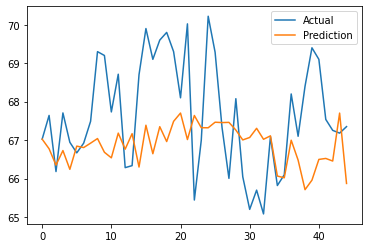

In [38]:
out.plot()

In [39]:
param_grid = {'kernel': ['linear','rbf'],'degree': np.arange(2, 5), 'C':[10**i for i in range(-3,4)], 'epsilon':[10**i for i in range(-3,4)]}

In [40]:
model=SVR()
gscv = GridSearchCV(model, param_grid, cv=5,scoring='neg_mean_squared_error',verbose=2)
gscv.fit(X_train_imputed, y_train)
print(gscv.best_params_)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] END ....C=0.001, degree=2, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END ....C=0.001, degree=2, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END ....C=0.001, degree=2, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END ....C=0.001, degree=2, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END ....C=0.001, degree=2, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END .......C=0.001, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .......C=0.001, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .......C=0.001, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .......C=0.001, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .......C=0.001, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .....C=0.001, degree=2, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END .....C=0.001, degree=2, epsilon=0.01

[CV] END .........C=0.001, degree=3, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END .........C=0.001, degree=3, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .....C=0.001, degree=3, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END ........C=0.001, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ........C=0.001, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ....C=0.001, degree

[CV] END ........C=0.01, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ...........C=0.01, degree=2, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.01, degree=2, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END .......C=0.01, degree=2, epsilon=100, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, epsilon=100, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, epsilon=100, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, epsilon=100, kernel=linear; total time=   0.0s
[CV] END .......C=0.01, degree=2, epsilon=100, kernel=linear; total time=   0.0s
[CV] END ..........C=0.01, degree=2, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.01, d

[CV] END .........C=0.01, degree=4, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.01, degree=4, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.01, degree=4, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .........C=0.01, degree=4, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.01, degree=4, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.01, degree=4, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ........C=0.01, degree=4, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=4, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=4, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, deg

[CV] END .......C=0.1, degree=3, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, degree=3, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, epsilon=0.01, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, degree=3, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, d

[CV] END ........C=0.1, degree=4, epsilon=100, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=4, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=4, epsilon=100, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, degree=4, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, degree=4, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, degree=4, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, degree=4, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, degree=4, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, degree=4, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, de

[CV] END ...............C=1, degree=3, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=3, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=3, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, degree=3, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ...........C=1, degree=3, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ...........C=1, degree=3, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ...........C=1, degree=3, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ...........C=1, degree=3, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ...........C=1, degree=3, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ..............C=1, degree=3, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, degree=3, epsilon=10, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, 

[CV] END .......C=10, degree=2, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END .......C=10, degree=2, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END ..........C=10, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, degree=2, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ........C=10, degree=2, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=10, degree=2, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=10, degree=2, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=10, degree=2, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=10, degree=2, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...........C=10, de

[CV] END ........C=10, degree=3, epsilon=1000, kernel=linear; total time=   0.0s
[CV] END ...........C=10, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END ...........C=10, degree=3, epsilon=1000, kernel=rbf; total time=   0.0s
[CV] END .......C=10, degree=4, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END .......C=10, degree=4, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END .......C=10, degree=4, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END .......C=10, degree=4, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END .......C=10, degree=4, epsilon=0.001, kernel=linear; total time=   0.0s
[CV] END ..........C=10, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=10, deg

[CV] END ..........C=100, degree=2, epsilon=1, kernel=linear; total time=   0.7s
[CV] END ..........C=100, degree=2, epsilon=1, kernel=linear; total time=   0.1s
[CV] END ..........C=100, degree=2, epsilon=1, kernel=linear; total time=   0.1s
[CV] END ..........C=100, degree=2, epsilon=1, kernel=linear; total time=   0.3s
[CV] END .............C=100, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .............C=100, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........C=100, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .........C=100, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .........C=100, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .........C=100, deg

[CV] END ......C=100, degree=4, epsilon=0.001, kernel=linear; total time=   0.3s
[CV] END ......C=100, degree=4, epsilon=0.001, kernel=linear; total time=   0.6s
[CV] END ......C=100, degree=4, epsilon=0.001, kernel=linear; total time=   0.1s
[CV] END ......C=100, degree=4, epsilon=0.001, kernel=linear; total time=   0.4s
[CV] END ......C=100, degree=4, epsilon=0.001, kernel=linear; total time=   0.1s
[CV] END .........C=100, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=100, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=100, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=100, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=100, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END .......C=100, degree=4, epsilon=0.01, kernel=linear; total time=   0.4s
[CV] END .......C=100, degree=4, epsilon=0.01, kernel=linear; total time=   0.1s
[CV] END .......C=100, degre

[CV] END .........C=1000, degree=2, epsilon=1, kernel=linear; total time=   3.4s
[CV] END .........C=1000, degree=2, epsilon=1, kernel=linear; total time=   2.5s
[CV] END .........C=1000, degree=2, epsilon=1, kernel=linear; total time=   4.4s
[CV] END ............C=1000, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=1000, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=1000, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=1000, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ............C=1000, degree=2, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END ........C=1000, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ........C=1000, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ........C=1000, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ........C=1000, degree=2, epsilon=10, kernel=linear; total time=   0.0s
[CV] END ........C=1000, deg

[CV] END .....C=1000, degree=4, epsilon=0.001, kernel=linear; total time=   2.9s
[CV] END .....C=1000, degree=4, epsilon=0.001, kernel=linear; total time=   1.4s
[CV] END .....C=1000, degree=4, epsilon=0.001, kernel=linear; total time=   2.5s
[CV] END .....C=1000, degree=4, epsilon=0.001, kernel=linear; total time=   3.6s
[CV] END .....C=1000, degree=4, epsilon=0.001, kernel=linear; total time=   0.9s
[CV] END ........C=1000, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ........C=1000, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ........C=1000, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ........C=1000, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ........C=1000, degree=4, epsilon=0.001, kernel=rbf; total time=   0.0s
[CV] END ......C=1000, degree=4, epsilon=0.01, kernel=linear; total time=   2.9s
[CV] END ......C=1000, degree=4, epsilon=0.01, kernel=linear; total time=   1.5s
[CV] END ......C=1000, degre

In [44]:
pipe_temp= Pipeline([('scaler', StandardScaler()),('imputer', KNNImputer()), ('model', SVR(**{'C': 0.001, 'degree': 2, 'epsilon':1, 'kernel': 'linear'}))])

In [45]:
out=batchwise_model(df,pipe_temp,window_size=150, test_period=45)

********************
Window size= 150 test period 45
Pipe line Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('model', SVR(C=0.001, degree=2, epsilon=1, kernel='linear'))])
2021-06-23 00:00:00 2021-11-20 00:00:00
2021-11-21 00:00:00 2022-01-05 00:00:00
         score
MAPE  2.331278
RMSE  1.959000
MSE   3.836394
MAE   1.597766
r2   -0.938531


<AxesSubplot:>

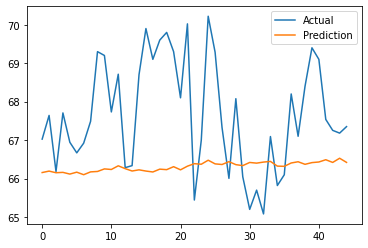

In [46]:
out.plot()